# load

> Module for loading training and target files

In [ ]:
#| default_exp load

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export

import numpy as np
import pkg_resources
from sepia.SepiaData import SepiaData

In [ ]:
#| hide

import matplotlib.pylab as plt

In [ ]:
#| export

DATA_DIR = "data/"
LIBRARY_ZK_FILE = pkg_resources.resource_stream("CubicGalileonEmu", DATA_DIR + "z_k.txt").name
LIBRARY_BK_FILE = pkg_resources.resource_stream("CubicGalileonEmu", DATA_DIR + "Boost.npy").name
LIBRARY_PARAM_FILE = pkg_resources.resource_stream("CubicGalileonEmu", DATA_DIR + "cosmo_newdesign.txt").name
# PARAM_NAME = [r"$\Omega_m h^2$", r"$n_s$", r"$\sigma_8$", r"$E_{ds}$", r"$f_\phi$"]
PARAM_NAME = [r"$\Omega_m$", r"$n_s$", r"$10^{9} A_s$", r"$h$", r"$f_\phi$"]


In [ ]:
#| export

def load_boost_training(Bk_fileIn:str=LIBRARY_BK_FILE, # Input file for Boost
                        Zk_fileIn:str=LIBRARY_ZK_FILE, # Input file for redshift and wavenumbers
                        ) -> tuple: # Boost, wavenumbers, redshifts 
    Bk_all = np.load(Bk_fileIn)
    zk_all = np.loadtxt(Zk_fileIn)
    
    z_all = zk_all[:, 0][np.isfinite(zk_all[:, 0])]
    k_all = zk_all[:, 1]

    # z_all_argsort = np.argsort(z_all)
    # z_all = z_all[z_all_argsort]
    # Bk_all = Bk_all[:, z_all_argsort, :]

    # k_select = np.where(k_all <= 4.0)
    # Bk_all = Bk_all[:, :, k_select]
    # k_all = k_all[k_select]

    
    return Bk_all, k_all, z_all

In [ ]:
# b, k, z = load_boost_training()

In [ ]:
# b[:, np.argsort(z), :]

# np.argsort(k)

In [ ]:
#| export

def load_params(p_fileIn:str=LIBRARY_PARAM_FILE, # Input file for parameters
               ) -> np.array: # Parameters
    p_all = np.loadtxt(p_fileIn)
    p_all[:, 2] = p_all[:, 2]/1e-9  # A_s rescaling
    return p_all

In [ ]:
#| hide

Bk_all, k_all, z_all = load_boost_training()
p_all = load_params()

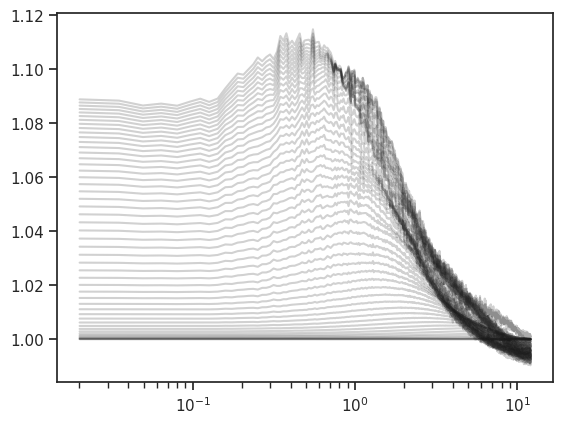

In [ ]:
#| hide

sim_index = 0

plt.figure(32)
for z_index in range(Bk_all.shape[1]):
    plt.plot(k_all, Bk_all[sim_index, z_index, :], 'k', alpha=0.2)
   
plt.xscale('log')
plt.show()

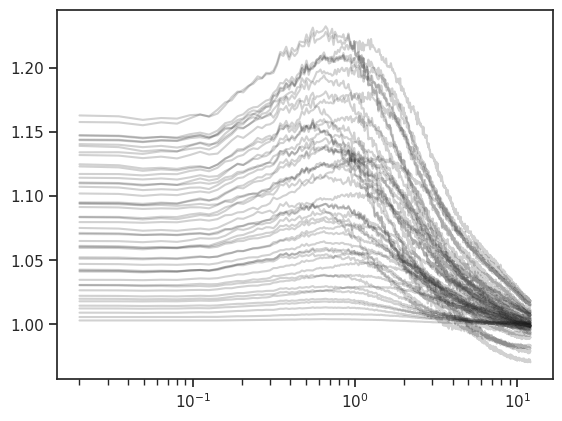

In [ ]:
#| hide

z_index = 12

plt.figure(32)
for sim_index in range(Bk_all.shape[0]):
    plt.plot(k_all, Bk_all[sim_index, z_index, :], 'k', alpha=0.2)
   
plt.xscale('log')
plt.show()

In [ ]:
#| export

def sepia_data_format(design:np.array=None, # Params array of shape (num_simulation, num_params)
                     y_vals:np.array=None, # Shape (num_simulation, num_y_values)
                     y_ind:np.array=None # Shape (num_y_values,)
                     ) -> SepiaData: #Sepia data format
    sepia_data = SepiaData(t_sim=design, y_sim=y_vals, y_ind_sim=y_ind)
    return sepia_data

In [ ]:
#| hide

z_index = 0
y_vals = Bk_all[:, z_index, :]
y_ind = np.arange(0, y_vals.shape[1])
sepia_data = sepia_data_format(p_all, y_vals, y_ind)
print(sepia_data)

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    50 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 



In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()